## Word Embedding Models Comparison

In [1]:
import pandas as pd
import nltk
from gensim.models import Word2Vec, KeyedVectors

D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### First Model - Large PreTrained Google News bin

In [2]:
GoogleModel = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

D:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Testing the model

In [71]:
len(GoogleModel.docvecs)

AttributeError: 'Word2VecKeyedVectors' object has no attribute 'docvecs'

In [3]:
GoogleModel.most_similar('girl')

[('boy', 0.8543272018432617),
 ('teenage_girl', 0.7927976846694946),
 ('woman', 0.7494641542434692),
 ('teenager', 0.7172499299049377),
 ('schoolgirl', 0.7075953483581543),
 ('teenaged_girl', 0.6650916934013367),
 ('daughter', 0.6489864587783813),
 ('mother', 0.64781653881073),
 ('toddler', 0.6473966240882874),
 ('girls', 0.6154742240905762)]

Placing the results of the most_similar into a dataframe

In [4]:
manList = GoogleModel.most_similar(positive=['man'], topn=15)
dfman = pd.DataFrame(manList, columns = ['Most Similar' , 'Vector Accuracy'])
print (dfman['Most Similar'].head(10))

0                       woman
1                         boy
2                    teenager
3                teenage_girl
4                        girl
5    suspected_purse_snatcher
6                      robber
7             Robbery_suspect
8                   teen_ager
9                         men
Name: Most Similar, dtype: object


Getting the most similar words from a list of words using a loop

In [5]:
words = ["Trump", "Obama", "Clinton" ]
for word in words:
    print("-- Word: %s" % word)
    result = GoogleModel.most_similar(positive=word)
    dfloop = pd.DataFrame(result, columns = ['Most Similar' , 'Vector Accuracy'])
    print (dfloop['Most Similar'])

-- Word: Trump
0                Donald_Trump
1    impersonator_entertained
2                Ivanka_Trump
3                      Ivanka
4          mogul_Donald_Trump
5                 Trump_Tower
6                     Kepcher
7    billionaire_Donald_Trump
8                   Trumpster
9         tycoon_Donald_Trump
Name: Most Similar, dtype: object
-- Word: Obama
0              Barack_Obama
1    President_Barack_Obama
2                    McCain
3                   Clinton
4          Illinois_senator
5                     Biden
6                      Bush
7                    Barack
8               White_House
9        elect_Barack_Obama
Name: Most Similar, dtype: object
-- Word: Clinton
0            Hillary_Clinton
1                      Obama
2               Bill_Clinton
3     Hillary_Rodham_Clinton
4       Sen._Hillary_Clinton
5                    Hillary
6    Senator_Hillary_Clinton
7                     McCain
8                   Clintons
9               Barack_Obama
Name: Most Simi

In [6]:
vec2 = GoogleModel['music'] - GoogleModel['piano'] + GoogleModel['drum']
GoogleModel.most_similar([vec2])

[('drum', 0.6940563321113586),
 ('drumming', 0.513245701789856),
 ('music', 0.5001342296600342),
 ('Drum', 0.40797555446624756),
 ('hip_hop', 0.4001891314983368),
 ('bands', 0.3928840458393097),
 ('bhangra', 0.3885735273361206),
 ('reggae_dancehall', 0.38298097252845764),
 ('reggae', 0.38292473554611206),
 ('reggae_hip_hop', 0.3807390034198761)]

## Model 2 - Self Trained Reddit Model

Reading in a csv of a medium size to a dataframe, and sepreating out the required 'Title' column to be used to train the model. 

In [7]:
dfReddit = pd.read_csv('RedditNews.csv')
dfReddit.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [65]:
newTitles = dfReddit["title"]
dfReddit.shape

(509236, 8)

Tokenize the newTitles list and print the first 10 objects in the list. 

In [9]:
newsVec = [nltk.word_tokenize(title) for title in newTitles]
newsVec[:10]

[['Scores', 'killed', 'in', 'Pakistan', 'clashes'],
 ['Japan', 'resumes', 'refuelling', 'mission'],
 ['US', 'presses', 'Egypt', 'on', 'Gaza', 'border'],
 ['Jump-start', 'economy', ':', 'Give', 'health', 'care', 'to', 'all'],
 ['Council', 'of', 'Europe', 'bashes', 'EU', '&', 'UN', 'terror', 'blacklist'],
 ['Hay',
  'presto',
  '!',
  'Farmer',
  'unveils',
  'the',
  'illegal',
  'mock-Tudor',
  'castle',
  'he',
  'tried',
  'to',
  'hide',
  'behind',
  '40ft',
  'hay',
  'bales'],
 ['Strikes',
  ',',
  'Protests',
  'and',
  'Gridlock',
  'at',
  'the',
  'Poland-Ukraine',
  'Border'],
 ['The', 'U.N', '.', 'Mismanagement', 'Program'],
 ['Nicolas', 'Sarkozy', 'threatens', 'to', 'sue', 'Ryanair'],
 ['US',
  'plans',
  'for',
  'missile',
  'shields',
  'in',
  'Polish',
  'town',
  'met',
  'with',
  'resistance',
  '[',
  'video',
  ']']]

### Using Word2Vec, assign each word in the model a vector of size 100

In [10]:
RedditModel = Word2Vec(newsVec,min_count=1,size=100)

In [11]:
RedditModel.wv.most_similar('man')

[('woman', 0.9017665982246399),
 ('boy', 0.8321921825408936),
 ('teenager', 0.829209566116333),
 ('girl', 0.8271787166595459),
 ('couple', 0.7789348363876343),
 ('doctor', 0.760718822479248),
 ('teen', 0.7583149075508118),
 ('mother', 0.7516800761222839),
 ('cop', 0.7289149165153503),
 ('teacher', 0.7220110893249512)]

## Model 3 - Small Wiki Dump bin

In [12]:
WikiModel = KeyedVectors.load_word2vec_format('wiki100k-w2v.cbow.bin', binary=True)

In [13]:
WikiModel.most_similar('girl')

[('boy', 0.7120599746704102),
 ('destiny', 0.7029043436050415),
 ('love', 0.6940176486968994),
 ('lovers', 0.6887222528457642),
 ('sorry', 0.6821417808532715),
 ('teenage', 0.6736853718757629),
 ('beasts', 0.667998194694519),
 ('mercy', 0.6590928435325623),
 ('hello', 0.657588005065918),
 ('restless', 0.6566181182861328)]

## Simple Comparisons of the 3 Models

In [14]:
GoogleModel.most_similar('dog')

[('dogs', 0.868048906326294),
 ('puppy', 0.8106427192687988),
 ('pit_bull', 0.7803961038589478),
 ('pooch', 0.7627377510070801),
 ('cat', 0.7609456777572632),
 ('golden_retriever', 0.7500902414321899),
 ('German_shepherd', 0.7465174198150635),
 ('Rottweiler', 0.7437615394592285),
 ('beagle', 0.7418622374534607),
 ('pup', 0.7406911253929138)]

In [15]:
RedditModel.wv.most_similar('dog')

[('cat', 0.7873145341873169),
 ('penis', 0.7758883237838745),
 ('pet', 0.7612196207046509),
 ('baby', 0.7503238916397095),
 ('chest', 0.7473967671394348),
 ('bullet', 0.7457801699638367),
 ('crocodile', 0.7418789267539978),
 ('horse', 0.7403489351272583),
 ('naked', 0.7370072603225708),
 ('pig', 0.7344769239425659)]

In [16]:
WikiModel.most_similar('dog')

[('dogs', 0.7068554162979126),
 ('rabbits', 0.6879082918167114),
 ('cat', 0.6614759564399719),
 ('cats', 0.6565462350845337),
 ('anthropomorphic', 0.6554036140441895),
 ('t_shirts', 0.6497201919555664),
 ('beast', 0.6489153504371643),
 ('coyote', 0.6422343254089355),
 ('flesh', 0.6411483883857727),
 ('beasts', 0.6408825516700745)]

In [22]:
print (dfloop)

  Most Similar Wiki  Vector Accuracy W
0              dogs           0.706855
1           rabbits           0.687908
2               cat           0.661476
3              cats           0.656546
4   anthropomorphic           0.655404
5          t_shirts           0.649720
6             beast           0.648915
7            coyote           0.642234
8             flesh           0.641148
9            beasts           0.640883


In [88]:
words = ["Trump", "Obama", "Clinton" ]
for word in words:
    print("-- Word: %s" % word)
    result = GoogleModel.most_similar(positive=word)
    dfloop = pd.DataFrame(result, columns = ['Most Similar' , 'Vector Accuracy'])
    print (dfloop['Most Similar'])

-- Word: Trump
0                Donald_Trump
1    impersonator_entertained
2                Ivanka_Trump
3                      Ivanka
4          mogul_Donald_Trump
5                 Trump_Tower
6                     Kepcher
7    billionaire_Donald_Trump
8                   Trumpster
9         tycoon_Donald_Trump
Name: Most Similar, dtype: object
-- Word: Obama
0              Barack_Obama
1    President_Barack_Obama
2                    McCain
3                   Clinton
4          Illinois_senator
5                     Biden
6                      Bush
7                    Barack
8               White_House
9        elect_Barack_Obama
Name: Most Similar, dtype: object
-- Word: Clinton
0            Hillary_Clinton
1                      Obama
2               Bill_Clinton
3     Hillary_Rodham_Clinton
4       Sen._Hillary_Clinton
5                    Hillary
6    Senator_Hillary_Clinton
7                     McCain
8                   Clintons
9               Barack_Obama
Name: Most Simi

In [64]:
word = 'fight'
result1 = GoogleModel.most_similar(positive=word)
result2 = RedditModel.most_similar(positive=word)
result3 = WikiModel.most_similar(positive=word)
dftable = pd.DataFrame(result2, columns = ['Most Similar' , 'Vector Accuracy'])
dftable.insert(0, 'Most Similar Google',  result1, True)
dftable.insert(1, 'Most Similar Reddit',  result2, True)
dftable.insert(2, 'Most Similar Wiki',  result3, True)
dftable = dftable.drop('Most Similar', 1)
dftable = dftable.drop('Vector Accuracy', 1)
print(dftable)


              Most Similar Google             Most Similar Reddit  \
0  (fighting, 0.7923014163970947)    (battle, 0.7798396944999695)   
1    (fights, 0.7620805501937866)    (combat, 0.6724058389663696)   
2    (battle, 0.7021284103393555)  (struggle, 0.6615628004074097)   
3    (fought, 0.6355067491531372)     (drive, 0.6563944220542908)   
4     (Fight, 0.6104654669761658)  (fighting, 0.6497069597244263)   
5    (fi_ght, 0.6078345775604248)      (help, 0.6312346458435059)   
6   (battles, 0.5902746319770813)     (jihad, 0.6170825362205505)   
7  (Fighting, 0.5883939266204834)      (push, 0.6057982444763184)   
8      (bout, 0.5700341463088989)  (campaign, 0.6028251647949219)   
9   (fighing, 0.5477024912834167)    (defend, 0.6016125679016113)   

                     Most Similar Wiki  
0         (fights, 0.7471963167190552)  
1        (enemies, 0.7032573223114014)  
2    (outnumbered, 0.6979172825813293)  
3         (avenge, 0.6823626756668091)  
4    (retaliation, 0.68078130483627

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
keys = ['college', 'Trump', 'food', 'hair', 'wife', 'king', 'rock', 'election', 'dog',
        'jogging', 'money', 'ice', 'New_York', 'fighting', 'graveyard', 'hero']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in GoogleModel.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(GoogleModel[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [86]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

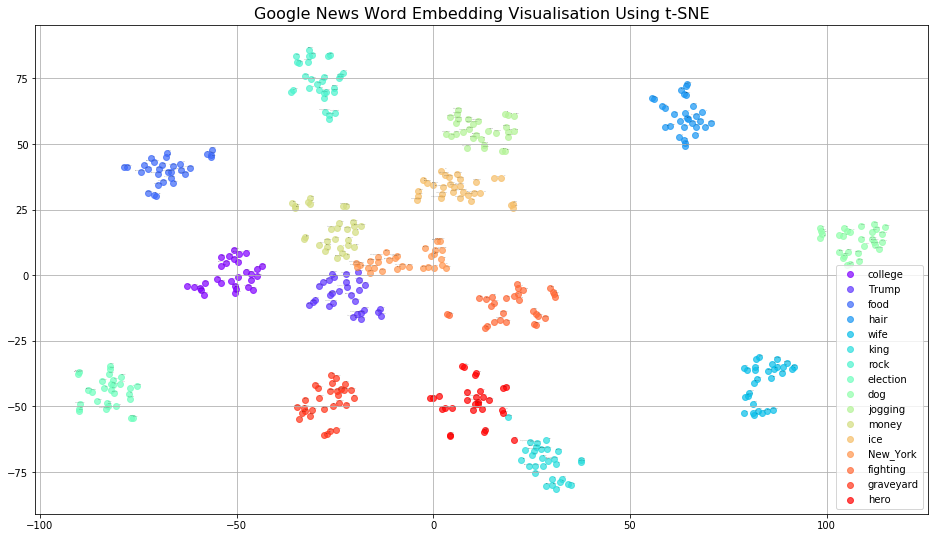

In [87]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=0)
    plt.legend(loc=4)
    plt.title('Google News Word Embedding Visualisation Using t-SNE', fontsize = 16)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')